In [ ]:
##### 4.10: CODING ETIQUETTE & EXCEL REPORTING 

#    TABLE OF CONTENTS

# 1. Import libraries and files

# 2. Consider security implications

# 3. Compare customer behavior in different geographic areas
#    - Create a regional segmentation of the data
#    - Determine whether there’s a difference in spending habits across the different regions

# 4. Create an exclusion flag for low-activity customers (customers with < 5 orders) and exclude them from the data.
#    - Excluding low-activity customers from the data and export the subset.
#    - Excluding high-activity customers from the data and export the subset.

# 5. Create customer profiling variables
#    - Investigate customer age and create age category column
#    - Investigate income and create income category column
#    - Investigate number of dependents and create number of dependents category column
#    - Investigate hour_order_was_placed and segment customers
#    - Investigate price range***
#    - Investigate day order was placed
#    - Segment customers by specific departments
#      - add department names to customers dataframe
#    - Customers who purchase alcohol
#    - Customers who purchase baby food, etc.
#    - Customers who purchase pet items

# 6. Create visualizations to show the distribution of profiles

# 7. Aggregate the max, mean, and min on a customer-profile level for usage frequency and expenditure
#    - Age Profile
#    - Customer income
#    - Number of Dependents
#    - Departments
#    - Days since prior order by department
#    - Alcohol purchasers
#    - Customers with baby
#    - Customers with pet(s)
#    - Family Size
#    - Time of order

# 8. Compare your customer profiles with regions and departments
#    - Customer loyalty vs. regions
#    - Customer loyalty vs. customer activity
#    - Customer loyalty vs. order frequency   
#    - Customer income category vs. region
#    - Customer income category vs. department
#    - Dependents category vs. region
#    - Alcohol category vs. region
#    - Babies category vs. region
#    - Pets category vs. region
#    - Time of order vs region and department

#9. Exporting updated dataframes and charts
#   - All Charts exported as the project progressed 
#   - Exporting dataframes


In [ ]:
# IMPORT LIBRARIES #

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [ ]:
##### 4.10.1 
##### Import instacart_merged dataframe

In [2]:
instacart_merged = pd.read_pickle(r'/Users/samantha/Documents/Instacart Analysis/02 Data/Prepared Data/orders_products_all.pkl')

In [ ]:
# SET PARAMETER TO DISPLAY MAX COLUMNS #

In [3]:
pd.set_option('display.max_columns', 50)

In [4]:
instacart_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_prior_orders,order_frequency_flag,Gender,State,Age,date_joined,dependents,mar_status,income,region,activity_level,age_category,income_category,dependent_category,time_of_order,price_range_loc,department,alcohol_purchase,have_baby,have_pet
0,2539329,1,1,2,8,999.0,196,1,0,Soda,77,7,9.0,both,Regularly busy,Regularly days,Average orders,10,New customer,6.37,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Adult 25-40,Low Income,3+ Dependents,Day,Mid-range product,beverages,No,No,No
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Regularly busy,Slowest days,Average orders,10,New customer,6.37,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Adult 25-40,Low Income,3+ Dependents,Overnight,Mid-range product,beverages,No,No,No
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Regularly busy,Slowest days,Most orders,10,New customer,6.37,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Adult 25-40,Low Income,3+ Dependents,Day,Mid-range product,beverages,No,No,No
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Least busy,Slowest days,Average orders,10,New customer,6.37,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Adult 25-40,Low Income,3+ Dependents,Overnight,Mid-range product,beverages,No,No,No
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Least busy,Slowest days,Most orders,10,New customer,6.37,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Adult 25-40,Low Income,3+ Dependents,Day,Mid-range product,beverages,No,No,No


In [5]:
instacart_merged.shape

(30964564, 41)

In [ ]:
##### 4.10.2 
##### Address any PII data in the data before continuing your analysis

First and last names were originally included in the dataframe.  
However, they have been removed from the analysis as they were considered to be PII. 

In [ ]:
##### 4.10.3
##### "Region" column created in a previous draft of this project. The code is included below. 

In [ ]:
# Region 1
Northeast = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New Jersey', 'New York', 'Pennsylvania']

# Region 2
Midwest = ['Indiana', 'Illinois', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota']

# Region 3 
South = ['Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas']

# Region 4
West = ['Arkansas', 'Colorado', 'Idaho', 'New Mexico', 'Montana', 'Utah', 'Nevada', 'Wyoming', 'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']

In [ ]:
instacart_merged.loc[instacart_merged['State'].isin(Northeast), 'region'] = 'Northeast'

In [ ]:
instacart_merged.loc[instacart_merged['State'].isin(Midwest), 'region'] = 'Midwest'

In [ ]:
instacart_merged.loc[instacart_merged['State'].isin(South), 'region'] = 'South'

In [ ]:
instacart_merged.loc[instacart_merged['State'].isin(West), 'region'] = 'West'

In [11]:
instacart_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_prior_orders,order_frequency_flag,Gender,State,Age,date_joined,dependents,mar_status,income,region,activity_level,age_category,income_category,dependent_category,time_of_order,price_range_loc,department,alcohol_purchase,have_baby,have_pet
0,2539329,1,1,2,8,999.0,196,1,0,Soda,77,7,9.0,both,Regularly busy,Regularly days,Average orders,10,New customer,6.37,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Adult 25-40,Low Income,3+ Dependents,Day,Mid-range product,beverages,No,No,No
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Regularly busy,Slowest days,Average orders,10,New customer,6.37,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Adult 25-40,Low Income,3+ Dependents,Overnight,Mid-range product,beverages,No,No,No
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Regularly busy,Slowest days,Most orders,10,New customer,6.37,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Adult 25-40,Low Income,3+ Dependents,Day,Mid-range product,beverages,No,No,No
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Least busy,Slowest days,Average orders,10,New customer,6.37,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Adult 25-40,Low Income,3+ Dependents,Overnight,Mid-range product,beverages,No,No,No
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Least busy,Slowest days,Most orders,10,New customer,6.37,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Adult 25-40,Low Income,3+ Dependents,Day,Mid-range product,beverages,No,No,No


In [12]:
instacart_merged.groupby('region')['spending_flag'].value_counts()

region     spending_flag
Midwest    Low spender      7112729
           High spender      148784
Northeast  Low spender      5361545
           High spender      103140
South      Low spender      9515471
           High spender      189855
West       Low spender      7757496
           High spender      150324
Name: spending_flag, dtype: int64

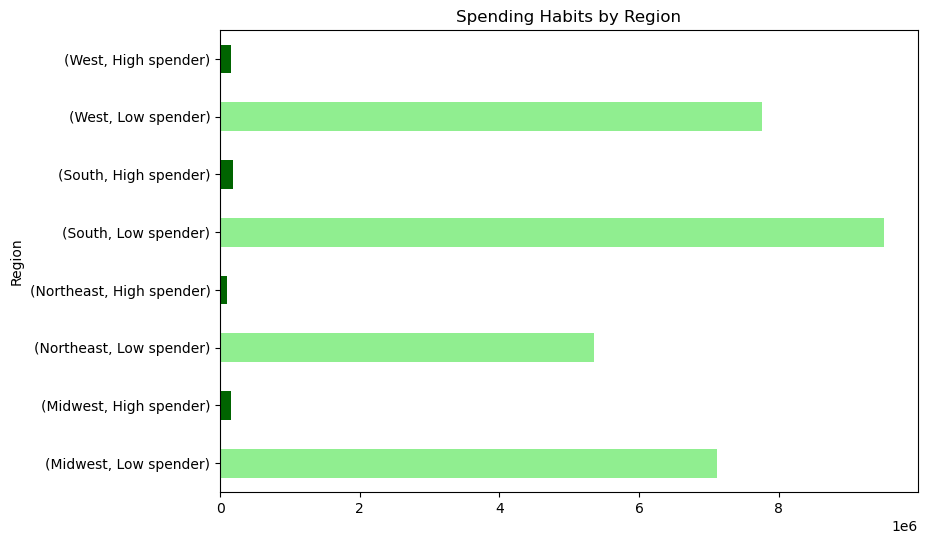

In [13]:
instabar = instacart_merged.groupby('region')['spending_flag'].value_counts().plot(kind= 'barh', \
                        color = ['lightgreen', 'darkgreen'], title='Spending Habits by Region', xlabel='Region', \
                        ylabel='Number of Customers', figsize=(9,6))

In [ ]:
# EXPORT BAR CHART #

In [14]:
instabar.figure.savefig('/Users/samantha/Documents/Instacart Analysis/04 Analysis/Visualizations/bar_spend_habit_region.png')

In [ ]:
##### 4.10.4
##### In a previous draft, an exclusion flag was created for low-activity customers (customers < 5 orders) and was excluded from the data

In [15]:
instacart_merged.loc[instacart_merged['max_order'] < 5, 'activity_level'] = 'Low Activity'

In [16]:
instacart_merged.loc[instacart_merged['max_order'] >=5, 'activity_level'] = 'High Activity'

In [17]:
instacart_merged['activity_level'].value_counts(dropna = False)

High Activity    30964564
Name: activity_level, dtype: int64

In [19]:
instacart_customer = instacart_merged[instacart_merged['activity_level'] == 'High Activity']

In [20]:
instacart_customer.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_prior_orders,order_frequency_flag,Gender,State,Age,date_joined,dependents,mar_status,income,region,activity_level,age_category,income_category,dependent_category,time_of_order,price_range_loc,department,alcohol_purchase,have_baby,have_pet
0,2539329,1,1,2,8,999.0,196,1,0,Soda,77,7,9.0,both,Regularly busy,Regularly days,Average orders,10,New customer,6.37,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Adult 25-40,Low Income,3+ Dependents,Day,Mid-range product,beverages,No,No,No
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Regularly busy,Slowest days,Average orders,10,New customer,6.37,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Adult 25-40,Low Income,3+ Dependents,Overnight,Mid-range product,beverages,No,No,No
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Regularly busy,Slowest days,Most orders,10,New customer,6.37,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Adult 25-40,Low Income,3+ Dependents,Day,Mid-range product,beverages,No,No,No
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Least busy,Slowest days,Average orders,10,New customer,6.37,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Adult 25-40,Low Income,3+ Dependents,Overnight,Mid-range product,beverages,No,No,No
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Least busy,Slowest days,Most orders,10,New customer,6.37,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Adult 25-40,Low Income,3+ Dependents,Day,Mid-range product,beverages,No,No,No


In [21]:
instacart_customer.to_pickle('/Users/samantha/Documents/Instacart Analysis/02 Data/Prepared Data/instacart_customer_high_activity.419.pkl')

In [ ]:
##### 4.10.5
##### Create profiling variable based on age, income, certain goods in the “department_id” column, 
##### and number of dependents. Might also use “orders_day_of_the_week” and “order_hour_of_day” columns

##### In a previous draft of this project, age categories were created. The code is noted below. 

In [24]:
customers = instacart_customer.copy()

In [25]:
customers['Age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

In [ ]:
customers.loc[(customers['Age'] >= 18) & (customers['Age'] < 25), 'age_category'] = 'Young Adult 18-25'

In [ ]:
customers.loc[(customers['Age'] >= 25) & (customers['Age'] < 40), 'age_category'] = 'Adult 25-40'

In [ ]:
customers.loc[(customers['Age'] >= 40) & (customers['Age'] < 60), 'age_category'] = 'Adult 40-60'

In [ ]:
customers.loc[(customers['Age'] >= 60), 'age_category'] = 'Adult 60+'

In [26]:
customers['age_category'].value_counts(dropna = False)

Adult 60+            10574504
Adult 40-60           9724950
Adult 25-40           7249916
Young Adult 18-25     3415194
Name: age_category, dtype: int64

In [ ]:
# CREATE BAR CHART FOR AGE CATEGORIES #

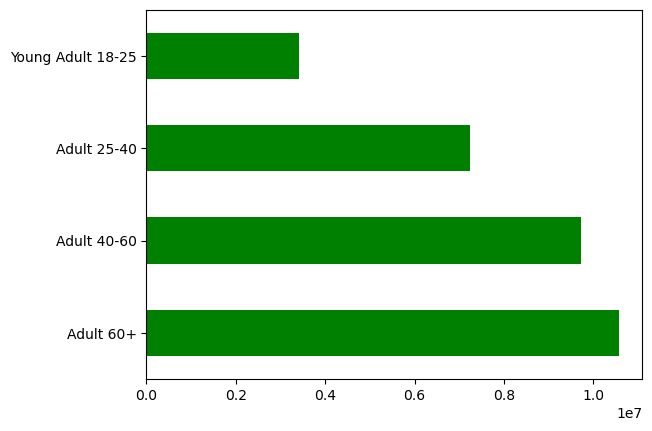

In [27]:
age_cat = customers['age_category'].value_counts().plot(kind = 'barh', color = 'green')

In [ ]:
# EXPORT BAR CHART #

In [28]:
age_cat.figure.savefig('/Users/samantha/Documents/Instacart Analysis/04 Analysis/Visualizations/bar_age_category.png')

In [ ]:
# DESCRIBE INCOME #

In [29]:
customers['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

In [ ]:
# CREATE HISTOGRAM FOR INCOME #

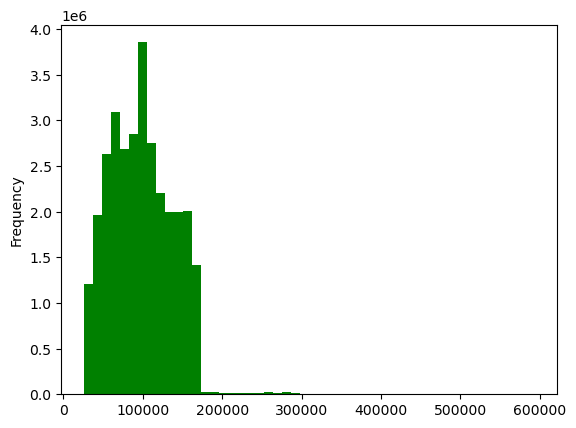

In [30]:
income_cat = customers['income'].plot.hist(bins = 50, color = 'green')

In [ ]:
# CREATE INCOME CATEGORY FLAG #

In [ ]:
# INCOME BREAKDOWNS BASED ON PEW RESEARCH DATA #

In [ ]:
# In a previous draft of this project, income categories were created. The code is noted below. 

In [ ]:
customers.loc[(customers['income'] < 52200), 'income_category'] = 'Low Income'

In [ ]:
customers.loc[(customers['income'] >= 52200) & (customers['income'] <= 156600), 'income_category'] = 'Middle Income'

In [ ]:
customers.loc[(customers['income'] > 156600), 'income_category'] = 'High Income'

In [31]:
customers['income_category'].value_counts(dropna = False)

Middle Income    24541393
Low Income        3691708
High Income       2731463
Name: income_category, dtype: int64

In [ ]:
# CREATE BAR CHART FOR INCOME CATEGORIES #

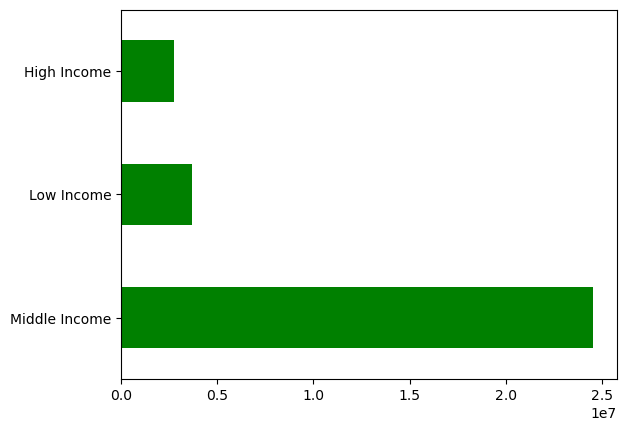

In [32]:
inc_cat = customers['income_category'].value_counts().plot(kind = 'barh', color = 'green')

In [ ]:
# EXPORT BAR CHART #

In [33]:
inc_cat.figure.savefig('/Users/samantha/Documents/Instacart Analysis/04 Analysis/Visualizations/bar_income_category.png')

In [ ]:
# DESCRIBE DEPENDENTS #

In [34]:
customers['dependents'].describe()

count    3.096456e+07
mean     1.501819e+00
std      1.118896e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: dependents, dtype: float64

In [ ]:
# CREATE DEPENDENT CATEGORY FLAG #
# In a previous draft of this project, dependent categories were created. The code is noted below. 

In [ ]:
customers.loc[customers['dependents'] == 0, 'dependent_category'] = 'Zero Dependents'

In [ ]:
customers.loc[customers['dependents'].isin([1, 2]), 'dependent_category'] = '1-2 Dependents'

In [ ]:
customers.loc[customers['dependents'] == 3, 'dependent_category'] = '3+ Dependents'

In [35]:
customers['dependent_category'].value_counts(dropna = False)

1-2 Dependents     15452367
3+ Dependents       7772516
Zero Dependents     7739681
Name: dependent_category, dtype: int64

In [ ]:
# CREATE BAR CHART FOR DEPENDENT CATEGORIES #

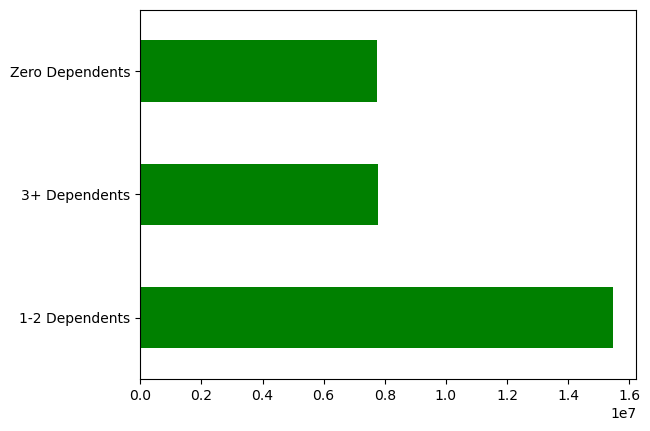

In [36]:
dep_cat = customers['dependent_category'].value_counts().plot(kind = 'barh', color = 'green')

In [ ]:
# EXPORT BAR CHART #

In [37]:
dep_cat.figure.savefig('/Users/samantha/Documents/Instacart Analysis/04 Analysis/Visualizations/bar_dependent_category.png')

In [ ]:
# DESCRIBE ORDER HOUR OF DAY #

In [38]:
customers['order_hour_of_day'].describe()

count    3.096456e+07
mean     1.341098e+01
std      4.248845e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.300000e+01
75%      1.600000e+01
max      2.300000e+01
Name: order_hour_of_day, dtype: float64

In [ ]:
# CREATE BAR CHART FOR ORDER HOUR OF DAY #

Text(0.5, 0, 'Hour')

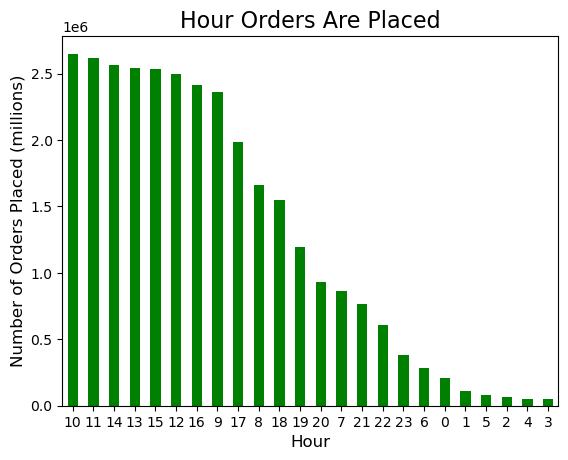

In [39]:
hour_order_placed_bar = customers['order_hour_of_day'].value_counts().plot(kind='bar', color = 'green', rot=0)
plt.title("Hour Orders Are Placed", fontsize = '16')
plt.ylabel('Number of Orders Placed (millions)', fontsize = 12)
plt.xlabel('Hour',  fontsize = 12)

In [ ]:
# CREATE ORDER HOUR OF DAY FLAG #
# In a previous draft of this project, time_of_order categories were created. The code is noted below. 

In [ ]:
customers.loc[customers['order_hour_of_day'].isin([8, 9, 10, 11, 12, 13, 14, 15, 16]), 'time_of_order'] = 'Day'
customers.loc[customers['order_hour_of_day'].isin([17, 18, 19, 20, 21, 22, 23]), 'time_of_order'] = 'Evening'
customers.loc[customers['order_hour_of_day'].isin([ 0, 1, 2, 3, 4, 5, 6, 7]), 'time_of_order'] = 'Overnight'

In [40]:
customers['time_of_order'].value_counts()

Day          21839966
Evening       7413041
Overnight     1711557
Name: time_of_order, dtype: int64

Text(0.5, 0, 'Frequency (millions)')

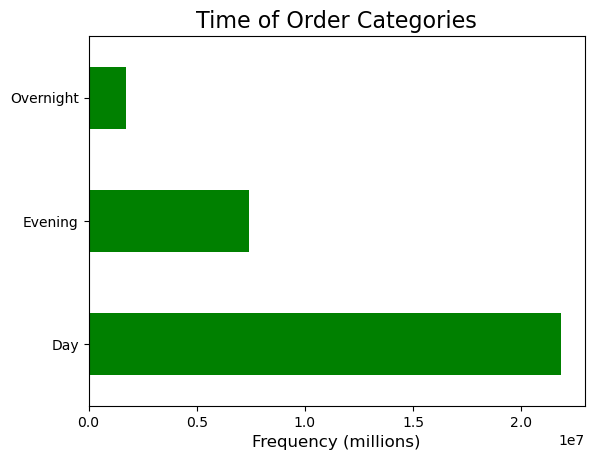

In [41]:
time_order_cat_ = customers['time_of_order'].value_counts().plot(kind='barh', color = 'green')
plt.title("Time of Order Categories", fontsize = '16')
plt.xlabel('Frequency (millions)',  fontsize = 12)

In [ ]:
# OVERNIGHT: 12AM, 1AM, 2AM, 3AM, 4AM, 5AM, 6AM, 7AM

In [ ]:
# EVENING: 5PM, 6PM, 7PM, 8PM, 9PM, 10PM, 11PM

In [ ]:
# DAY: 8AM, 9AM, 10AM, 11AM, 12PM, 1PM, 2PM, 3PM, 4PM

In [ ]:
# EXPORT BAR CHART #

In [42]:
time_order_cat_.figure.savefig('/Users/samantha/Documents/Instacart Analysis/04 Analysis/Visualizations/bar_hour_order_placed.png')

In [ ]:
# DESCRIBE PRICE RANGE CATEGORIES #
# In a previous draft of this project, price categories were created. The code is noted below. 
# Outliers were also removed in a previous draft of this project. 

In [43]:
customers['prices'].describe()

count    3.096456e+07
mean     8.023407e+00
std      1.902813e+01
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      1.485967e+03
Name: prices, dtype: float64

In [44]:
customers['price_range_loc'].value_counts()

Mid-range product     20891771
Low-range product      9674840
High-range product      397953
Name: price_range_loc, dtype: int64

Text(0, 0.5, 'Frequency (millions)')

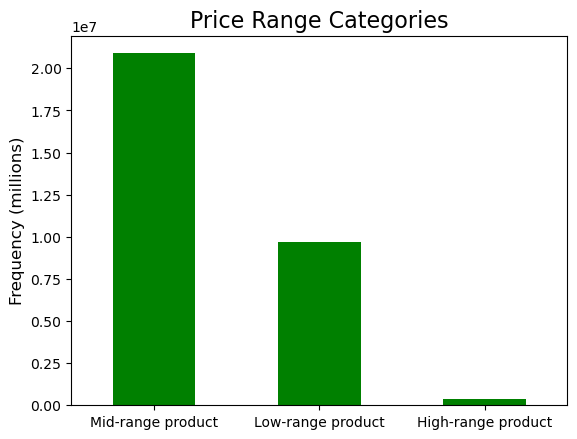

In [45]:
price_range_cat_bar = customers['price_range_loc'].value_counts().plot(kind='bar', color = 'green', rot=0)
plt.title("Price Range Categories", fontsize = '16')
plt.ylabel('Frequency (millions)',  fontsize = 12)

In [ ]:
# EXPORT BAR CHART #

In [46]:
price_range_cat_bar.figure.savefig('/Users/samantha/Documents/Instacart Analysis/04 Analysis/Visualizations/bar_price_range_category.png')

In [ ]:
# BREAKDOWN OF HIGH-RANGE PRODUCTS #

In [47]:
customers[customers['price_range_loc'] == 'High-range product'].department_id.value_counts()

12    392855
16      4877
13       221
Name: department_id, dtype: int64

In [ ]:
# 12 = meat/seafood
# 16 = dairy/eggs
# 13 = pantry

In [ ]:
# INVESTIGATE ORDERS DAY OF WEEK #

In [48]:
day_order_placed = customers['orders_day_of_week'].value_counts()
day_order_placed

0    5908610
1    5411686
6    4291304
5    4033729
2    4024706
3    3669535
4    3624994
Name: orders_day_of_week, dtype: int64

In [49]:
day_order_placed.info()

<class 'pandas.core.series.Series'>
Int64Index: 7 entries, 0 to 4
Series name: orders_day_of_week
Non-Null Count  Dtype
--------------  -----
7 non-null      int64
dtypes: int64(1)
memory usage: 112.0 bytes


In [ ]:
# COUNT OF ORDERS PLACED ON EACH DAY #

In [50]:
df_day_order_placed = day_order_placed.to_frame()
df_day_order_placed

,orders_day_of_week
0,5908610
1,5411686
6,4291304
5,4033729
2,4024706
3,3669535
4,3624994


In [ ]:
# CREATE INDEX FOR ORDERS DAY OF WEEK #

In [51]:
df_day_order_placed['index1'] = df_day_order_placed.index
df_day_order_placed

,orders_day_of_week,index1
0,5908610,0
1,5411686,1
6,4291304,6
5,4033729,5
2,4024706,2
3,3669535,3
4,3624994,4


In [ ]:
# MAP DAYS OF WEEK TO CORRESPONDING INDEX #

In [52]:
equiv_dict = {0:'Saturday', 1:'Sunday', 2:'Monday', 3:'Tuesday', 4:'Wednesday', 5:'Thursday', 6:'Friday'}
df_day_order_placed['day'] = df_day_order_placed['index1'].map(equiv_dict)
df_day_order_placed

,orders_day_of_week,index1,day
0,5908610,0,Saturday
1,5411686,1,Sunday
6,4291304,6,Friday
5,4033729,5,Thursday
2,4024706,2,Monday
3,3669535,3,Tuesday
4,3624994,4,Wednesday


In [ ]:
# RENAME ORDERS_DAY_OF_WEEK COLUMN #

In [53]:
df_day_order_placed.rename(columns = {'orders_day_of_week':'number_of_orders'}, inplace=True)
df_day_order_placed

,number_of_orders,index1,day
0,5908610,0,Saturday
1,5411686,1,Sunday
6,4291304,6,Friday
5,4033729,5,Thursday
2,4024706,2,Monday
3,3669535,3,Tuesday
4,3624994,4,Wednesday


In [54]:
# DROP INDEX1 COLUMN
df_day_order_placed = df_day_order_placed[['day', 'number_of_orders']]
df_day_order_placed

,day,number_of_orders
0,Saturday,5908610
1,Sunday,5411686
6,Friday,4291304
5,Thursday,4033729
2,Monday,4024706
3,Tuesday,3669535
4,Wednesday,3624994


In [ ]:
# CREATE BAR CHART FOR DAYS ORDERS ARE PLACED #

Text(0, 0.5, 'Day')

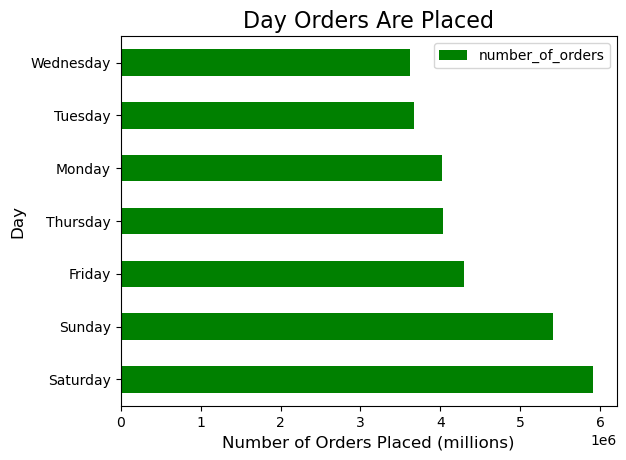

In [55]:
df_day_order_placed_barh = df_day_order_placed.plot.barh(x='day', y='number_of_orders', color= ['green'])
plt.title("Day Orders Are Placed", fontsize = '16')
plt.xlabel('Number of Orders Placed (millions)', fontsize = 12)
plt.ylabel('Day',  fontsize = 12)

In [ ]:
# EXPORT BAR CHART #

In [57]:
df_day_order_placed_barh.figure.savefig('/Users/samantha/Documents/Instacart Analysis/04 Analysis/Visualizations/bar_day_order_placed.png')

In [ ]:
# INVESTIGATE CUSTOMERS IN RELATION TO SPECIFIC DEPARTMENT #
# In a previous draft of this project, the departments dataframe was merged with the customers dataframe. The code is noted below. 

In [ ]:
departments = pd.read_csv('/Users/samantha/Documents/Instacart Analysis/02 Data/Prepared Data/departments_wrangled.csv')

In [ ]:
departments.head()

In [ ]:
departments.rename(columns= {"Unnamed: 0": "department_id"}, inplace = True)

In [ ]:
# CREATE DICTIONARY #

In [ ]:
departments_dict = dict(zip(departments["department_id"], departments["department"]))

In [ ]:
departments_dict

In [ ]:
# MERGE DEPARTMENT NAMES INTO CUSTOMER DATAFRAME #

In [ ]:
customers['department'] = customers['department_id'].map(departments_dict)

In [60]:
customers.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_prior_orders,order_frequency_flag,Gender,State,Age,date_joined,dependents,mar_status,income,region,activity_level,age_category,income_category,dependent_category,time_of_order,price_range_loc,department,alcohol_purchase,have_baby,have_pet
0,2539329,1,1,2,8,999.0,196,1,0,Soda,77,7,9.0,both,Regularly busy,Regularly days,Average orders,10,New customer,6.37,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Adult 25-40,Low Income,3+ Dependents,Day,Mid-range product,beverages,No,No,No
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Regularly busy,Slowest days,Average orders,10,New customer,6.37,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Adult 25-40,Low Income,3+ Dependents,Overnight,Mid-range product,beverages,No,No,No
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Regularly busy,Slowest days,Most orders,10,New customer,6.37,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Adult 25-40,Low Income,3+ Dependents,Day,Mid-range product,beverages,No,No,No
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Least busy,Slowest days,Average orders,10,New customer,6.37,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Adult 25-40,Low Income,3+ Dependents,Overnight,Mid-range product,beverages,No,No,No
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Least busy,Slowest days,Most orders,10,New customer,6.37,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Adult 25-40,Low Income,3+ Dependents,Day,Mid-range product,beverages,No,No,No


In [ ]:
# INVESTIGATE WHICH CUSTOMERS PURCHASE ALCOHOL #

In [ ]:
# CREATE alcohol_purchase COLUMN #
# In a previous draft of this project, an alcohol_purchase column was created. The code is noted below. 

In [ ]:
customers.loc[customers['department'] =='alcohol', 'alcohol_purchase'] = 'Yes'
customers.loc[customers['department'] !='alcohol', 'alcohol_purchase'] = 'No'

In [61]:
customers['alcohol_purchase'].value_counts(dropna = False,normalize = True)

No     0.995329
Yes    0.004671
Name: alcohol_purchase, dtype: float64

In [ ]:
##### 4.10.6 
##### Create an appropriate visualization to show the distribution of profiles.

In [ ]:
# CREATE PIE CHART FOR CUSTOMERS WHO PURCHASE ALCOHOL #

Text(0.5, 1.0, 'Customers Who Purchase Alcohol')

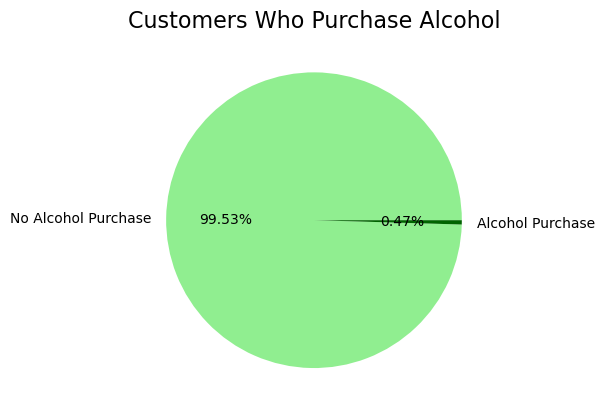

In [62]:
alcohol_buy_pie = customers['alcohol_purchase'].value_counts().plot.pie(labels = ['No Alcohol Purchase', 'Alcohol Purchase'], autopct=('%.2f%%'), colors = ['lightgreen', 'darkgreen'], label = '')
plt.title("Customers Who Purchase Alcohol", fontsize = '16')

In [ ]:
# EXPORT PIE CHART #

In [63]:
alcohol_buy_pie.figure.savefig('/Users/samantha/Documents/Instacart Analysis/04 Analysis/Visualizations/pie_alcohol_buy.png')

In [ ]:
# CREATE COLUMN FOR CUSTOMERS WHO PURCHASE BABY ITEMS #
# In a previous draft of this project, a have_baby column was created. The code is noted below. 

In [ ]:
customers.loc[customers['department'] =='babies', 'have_baby'] = 'Yes'
customers.loc[customers['department'] !='babies', 'have_baby'] = 'No'

In [64]:
customers['have_baby'].value_counts(dropna = False, normalize = True)

No     0.986746
Yes    0.013254
Name: have_baby, dtype: float64

In [ ]:
# CREATE PIE CHART FOR CUSTOMERS WHO PURCHASE BABY ITEMS #

Text(0.5, 1.0, 'Customers Who Purchase Baby Items')

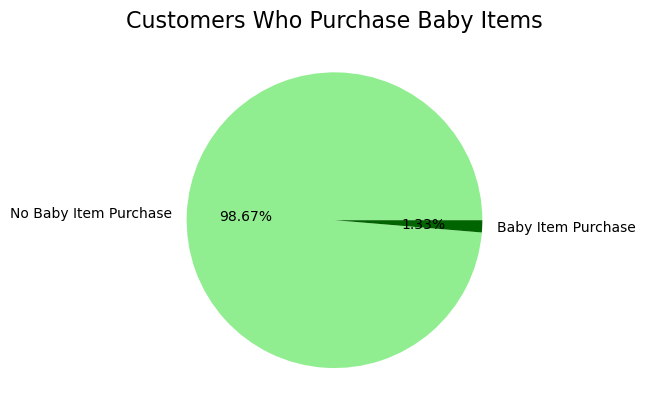

In [65]:
babyfood_buy_pie = customers['have_baby'].value_counts().plot.pie(labels = ['No Baby Item Purchase', 'Baby Item Purchase'], autopct=('%.2f%%'), colors = ['lightgreen', 'darkgreen'], label = '')
plt.title("Customers Who Purchase Baby Items", fontsize = '16')

In [ ]:
# EXPORT PIE CHART #

In [66]:
babyfood_buy_pie.figure.savefig('/Users/samantha/Documents/Instacart Analysis/04 Analysis/Visualizations/pie_baby_buy.png')

In [ ]:
# CREATE COLUMN FOR CUSTOMERS WITH PETS #
# In a previous draft of this project, a have_pet column was created. The code is noted below. 

In [ ]:
customers.loc[customers['department'] =='pets', 'have_pet'] = 'Yes'
customers.loc[customers['department'] !='pets', 'have_pet'] = 'No'

In [67]:
customers['have_pet'].value_counts(dropna = False, normalize = True)

No     0.996995
Yes    0.003005
Name: have_pet, dtype: float64

In [ ]:
# CREATE PIE CHART FOR CUSTOMERS WHO PURCHASE PET ITEMS #

Text(0.5, 1.0, 'Customers Who Purchase Pet Items')

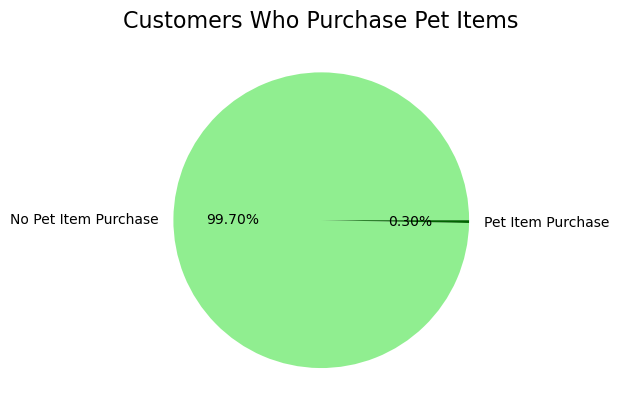

In [68]:
pet_item_buy_pie = customers['have_pet'].value_counts().plot.pie(labels = ['No Pet Item Purchase', 'Pet Item Purchase'], autopct=('%.2f%%'), colors = ['lightgreen', 'darkgreen'], label = '')
plt.title("Customers Who Purchase Pet Items", fontsize = '16')

In [ ]:
# EXPORT PIE CHART #

In [69]:
pet_item_buy_pie.figure.savefig('/Users/samantha/Documents/Instacart Analysis/04 Analysis/Visualizations/pie_buy_pet_item.png')

In [ ]:
# CREATE PIE CHART FOR NUMBER OF DEPENDENTS PER HOUSEHOLD #

Text(0.5, 1.0, 'Number of Children in Household')

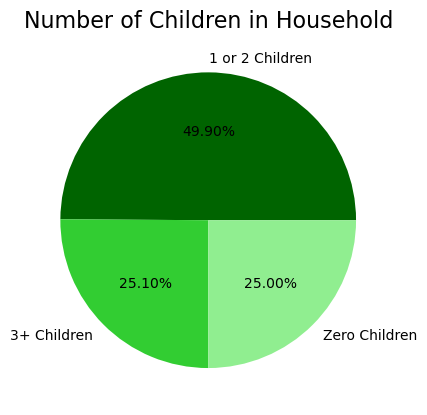

In [70]:
dependents_category_pie = customers['dependent_category'].value_counts().plot.pie(labels = ['1 or 2 Children', '3+ Children',\
                    'Zero Children'], autopct=('%.2f%%'), colors = ['darkgreen', 'limegreen', 'lightgreen'], label = '')
plt.title("Number of Children in Household", fontsize = '16')

In [ ]:
# EXPORT PIE CHART #

In [71]:
dependents_category_pie.figure.savefig('/Users/samantha/Documents/Instacart Analysis/04 Analysis/Visualizations/pie_kids_per_home.png')

In [ ]:
# CREATE PIE CHART FOR CUSTOMER INCOME #

Text(0.5, 1.0, 'Customer Income Categories')

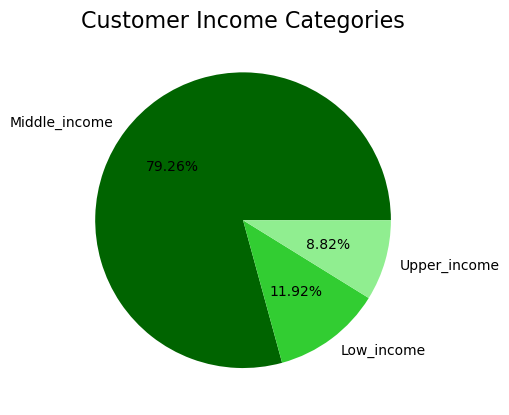

In [72]:
income_category_pie = customers['income_category'].value_counts().plot.pie(labels = ['Middle_income', 'Low_income',\
                    'Upper_income'], autopct=('%.2f%%'), colors = ['darkgreen', 'limegreen', 'lightgreen'], label = '')
plt.title("Customer Income Categories", fontsize = '16')

In [ ]:
# EXPORT PIE CHART #

In [73]:
income_category_pie.figure.savefig('/Users/samantha/Documents/Instacart Analysis/04 Analysis/Visualizations/pie_income_category.png')

In [ ]:
# CREATE PIE CHART FOR CUSTOMER AGE #

Text(0.5, 1.0, 'Customer Age Categories')

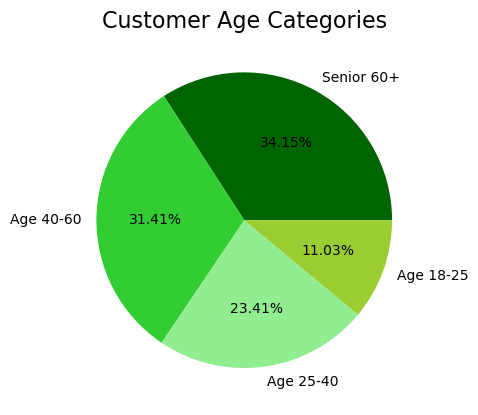

In [74]:
age_category_pie = customers['age_category'].value_counts().plot.pie(labels = ['Senior 60+', 'Age 40-60', 'Age 25-40', \
                'Age 18-25'], autopct=('%.2f%%'), colors = ['darkgreen', 'limegreen', 'lightgreen', 'yellowgreen'],\
                label = '')
plt.title("Customer Age Categories", fontsize = '16')

In [ ]:
# EXPORT PIE CHART #

In [75]:
age_category_pie.figure.savefig('/Users/samantha/Documents/Instacart Analysis/04 Analysis/Visualizations/pie_age_category.png')

In [76]:
##### 4.10.7
##### Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [ ]:
# AGGREGATION OF AGE CATEGORY VS PRICES # 

In [77]:
customers.groupby('age_category').agg({'prices' : ['mean', 'min', 'max']})

prices                  
                       mean  min          max
age_category                                 
Adult 25-40        8.001645  1.0  1485.966707
Adult 40-60        8.028758  1.0  1485.966707
Adult 60+          8.025674  1.0  1485.966707
Young Adult 18-25  8.047345  1.0  1485.966707

In [ ]:
# Observation: No significant difference between age categories in regards to price. 

In [ ]:
# AGGREGATION OF AGE CATEGORY VS DAYS SINCE PRIOR ORDER #

In [78]:
customers.groupby('age_category').agg({'days_since_prior_order' : ['mean', 'min', 'max']})

days_since_prior_order            
                                    mean  min    max
age_category                                        
Adult 25-40                    63.546806  0.0  999.0
Adult 40-60                    63.832672  0.0  999.0
Adult 60+                      64.019027  0.0  999.0
Young Adult 18-25              63.818037  0.0  999.0

In [ ]:
# Observation: No significant difference between age categories in regards to days since prior order 

In [ ]:
# AGGREGATION OF INCOME CATEGORY VS PRICES #

In [79]:
customers.groupby('income_category').agg({'prices' : ['mean', 'min', 'max']})

prices                  
                     mean  min          max
income_category                            
High Income      9.807589  1.0  1485.966707
Low Income       6.766241  1.0    25.000000
Middle Income    8.013940  1.0  1485.966707

In [ ]:
# BAR CHART FOR INCOME CATEGORY VS PRICES #

In [80]:
income_category_prices_mean = customers.groupby('income_category').agg({'prices' : ['mean']})

Text(0.5, 0, 'Income Category')

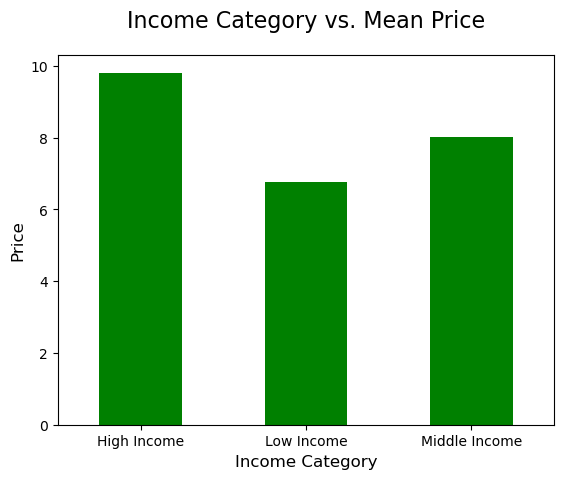

In [81]:
bar_income_prices = income_category_prices_mean.plot(kind = 'bar', rot = 0, color= 'green', legend=None)
plt.title('Income Category vs. Mean Price', fontsize = 16, pad=20)
plt.ylabel('Price', fontsize = 12)
plt.xlabel('Income Category',  fontsize = 12)

In [ ]:
# Observation:
# Low Income catgoy spends the least
# High Income spends the most

In [ ]:
# EXPORT BAR CHART #

In [82]:
bar_income_prices.figure.savefig('/Users/samantha/Documents/Instacart Analysis/04 Analysis/Visualizations/pie_income_category_prices.png')

In [ ]:
# AGGREGATION OF INCOME VS DAYS SINCE PRIOR ORDER #

In [182]:
customers_new.groupby('income_category').agg({'days_since_prior_order' : ['mean', 'min', 'max']})

days_since_prior_order                 
                                  mean  min         max
income_category                                        
High Income                  48.174071  0.0  732.296896
Low Income                   52.604716  0.0  732.296896
Middle Income                49.204326  0.0  732.296896

In [ ]:
# BAR CHART OF INCOME VS DAYS SINCE PRIOR ORDER #

Text(0.5, 0, 'Income Category')

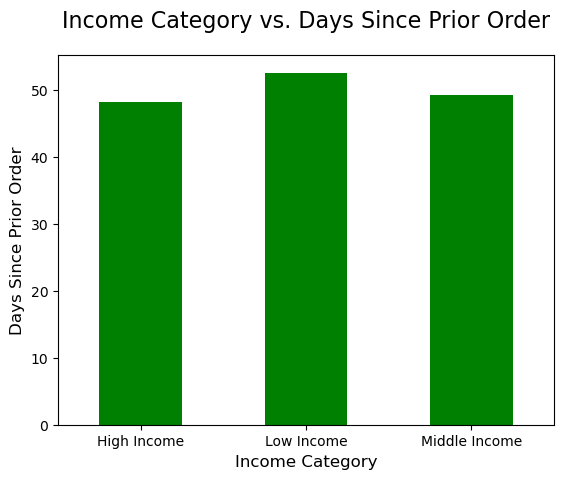

In [184]:
income_cat_days_since_prior_mean = customers_new.groupby('income_category').agg({'days_since_prior_order' : ['mean']})

bar_income_cat_days_since_prior_mean = income_cat_days_since_prior_mean.plot(kind = 'bar', rot = 0, color= 'green', legend=None)
plt.title('Income Category vs. Days Since Prior Order', fontsize = 16, pad=20)
plt.ylabel('Days Since Prior Order', fontsize = 12)
plt.xlabel('Income Category',  fontsize = 12)

In [ ]:
# EXPORT BAR CHART #

In [186]:
bar_income_cat_days_since_prior_mean.figure.savefig('/Users/samantha/Documents/Instacart Analysis/04 Analysis/Visualizations/bar_income_cat_days_since_prior_mean.png')

In [ ]:
# AGGREGATION OF DEPENDENTS VS PRICES #

In [83]:
customers.groupby('dependents').agg({'prices' : ['mean', 'min', 'max']})

prices                  
                mean  min          max
dependents                            
0           8.013577  1.0  1485.966707
1           8.018045  1.0  1485.966707
2           8.039576  1.0  1485.966707
3           8.022433  1.0  1485.966707

In [ ]:
# Observation: No significant difference between mean for number of dependents

In [ ]:
# AGGREGATION OF DEPARTMENT VS PRICES #

In [84]:
customers.groupby('department').agg({'prices' : ['mean', 'min', 'max']})

prices                  
                      mean  min          max
department                                  
alcohol           8.150699  1.0    15.000000
babies            7.634399  1.0    15.000000
bakery            7.857482  1.0    15.000000
beverages         7.682556  1.0    15.000000
breakfast         8.031647  1.0    14.900000
bulk              8.346919  1.4    14.100000
canned goods      7.546660  1.0    15.000000
dairy eggs        9.728327  1.0  1485.966707
deli              7.783347  1.0    15.000000
dry goods pasta   7.349370  1.0    15.000000
frozen            7.733725  1.0    15.000000
household         7.379951  1.0    15.000000
international     7.678797  1.0    15.000000
meat seafood     16.300034  8.0    25.000000
missing           8.660655  1.0    15.000000
other             6.961995  1.1    15.000000
pantry            8.014482  1.0    20.000000
personal care     7.998744  1.0    15.000000
pets              7.887489  1.0    15.000000
produce           7.980348  1.0    15.000000
snacks            4.275555  1.6     7.000000

In [ ]:
# Observations:
#   There appears to be outliers with dairy/eggs, which likely skews its mean
#   Meat/Seafood has the highest max price (25) and mean (~16)
#   Snacks have the lowest max price (7.0) and mean (~4.2)
#   The means for remaining departments range from approx 6.9 to approx 8.6, which is not a significant variation

In [85]:
order_freq_by_dept = customers.groupby('department').days_since_prior_order.mean().sort_values()

order_freq_by_dept

department
missing            30.929502
bulk               52.844280
babies             54.819636
produce            61.803501
dairy eggs         61.836037
beverages          62.377889
snacks             62.785840
other              63.445613
bakery             63.898568
meat seafood       66.030798
breakfast          66.054423
deli               66.441758
pantry             66.994931
pets               67.351332
canned goods       67.553116
personal care      68.445865
dry goods pasta    69.270312
household          69.325189
international      69.329394
frozen             69.730274
alcohol            76.747827
Name: days_since_prior_order, dtype: float64

<AxesSubplot:title={'center':'Days Since Prior Order by Department'}, xlabel='Days Since Prior Order', ylabel='Department'>

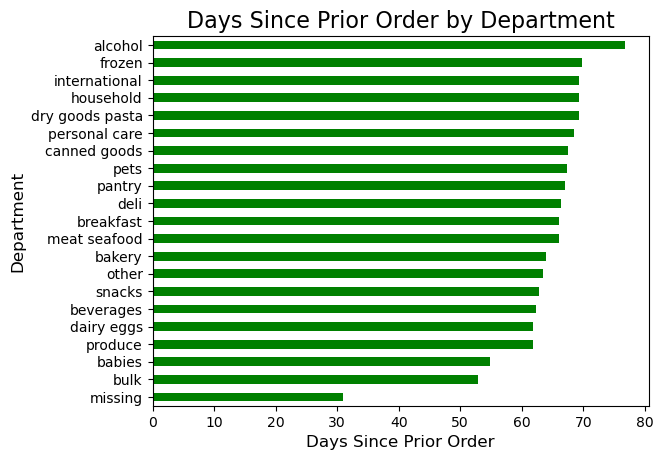

In [86]:
order_freq_dept = customers.groupby('department').days_since_prior_order.mean().sort_values().plot(kind='barh', color='green')
plt.title("Days Since Prior Order by Department", fontsize = '16')
plt.ylabel('Department', fontsize = 12)
plt.xlabel('Days Since Prior Order',  fontsize = 12)

order_freq_dept

In [ ]:
# EXPORT BAR CHART #

In [87]:
order_freq_dept.figure.savefig('/Users/samantha/Documents/Instacart Analysis/04 Analysis/Visualizations/bar_order_freq_depts.png')

In [ ]:
# AGGREGATION OF ALCOHOL VS PRICES #

In [88]:
customers.groupby('alcohol_purchase').agg({'prices' : ['mean', 'min', 'max']})

prices                  
                      mean  min          max
alcohol_purchase                            
No                8.022810  1.0  1485.966707
Yes               8.150699  1.0    15.000000

In [ ]:
# BAR CHART OF ALCOHOL PURCHASES VS MEAN PRICE #

Text(0.5, 0, 'Alcohol Purchases')

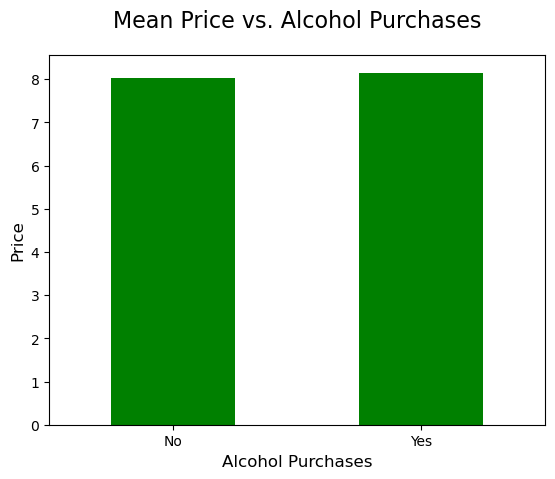

In [89]:
alc_price_mean = customers.groupby('alcohol_purchase').agg({'prices' : ['mean']})
bar_alc_price_mean = alc_price_mean.plot(kind = 'bar', rot = 0, color= 'green', legend=None)
plt.title('Mean Price vs. Alcohol Purchases', fontsize = 16, pad=20)
plt.ylabel('Price', fontsize = 12)
plt.xlabel('Alcohol Purchases',  fontsize = 12)

In [ ]:
# Observation: No significant difference in the mean. 

In [90]:
bar_alc_price_mean.figure.savefig('/Users/samantha/Documents/Instacart Analysis/04 Analysis/Visualizations/bar_alc_price_mean.png')

In [ ]:
# AGGREGATION OF ALCOHOL PURHCASES VS DAYS SINCE PRIOR ORDER #

In [91]:
customers.groupby('alcohol_purchase').agg({'days_since_prior_order' : ['mean', 'min', 'max']})

days_since_prior_order            
                                   mean  min    max
alcohol_purchase                                   
No                            63.767138  0.0  999.0
Yes                           76.747827  0.0  999.0

In [ ]:
# outliers identified. Will remove outliers. Code noted below #

In [92]:
upper_limit = customers['days_since_prior_order'].mean() + 3*customers['days_since_prior_order'].std()
lower_limit = customers['days_since_prior_order'].mean() - 3*customers['days_since_prior_order'].std()
print('upper limit', upper_limit)
print('lower limit', lower_limit)

upper limit 732.2968960636746
lower limit -604.6413617567811


In [93]:
customers.loc[(customers['days_since_prior_order'] > upper_limit) | (customers['days_since_prior_order'] < lower_limit)]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_prior_orders,order_frequency_flag,Gender,State,Age,date_joined,dependents,mar_status,income,region,activity_level,age_category,income_category,dependent_category,time_of_order,price_range_loc,department,alcohol_purchase,have_baby,have_pet
0,2539329,1,1,2,8,999.0,196,1,0,Soda,77,7,9.0,both,Regularly busy,Regularly days,Average orders,10,New customer,6.37,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Adult 25-40,Low Income,3+ Dependents,Day,Mid-range product,beverages,No,No,No
10,2539329,1,1,2,8,999.0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Regularly busy,Regularly days,Average orders,10,New customer,6.37,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Adult 25-40,Low Income,3+ Dependents,Day,Mid-range product,dairy eggs,No,No,No
11,2539329,1,1,2,8,999.0,12427,3,0,Original Beef Jerky,23,19,4.4,both,Regularly busy,Regularly days,Average orders,10,New customer,6.37,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Adult 25-40,Low Income,3+ Dependents,Day,Low-range product,snacks,No,No,No
21,2539329,1,1,2,8,999.0,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,both,Regularly busy,Regularly days,Average orders,10,New customer,6.37,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Adult 25-40,Low Income,3+ Dependents,Day,Low-range product,snacks,No,No,No
23,2539329,1,1,2,8,999.0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both,Regularly busy,Regularly days,Average orders,10,New customer,6.37,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Adult 25-40,Low Income,3+ Dependents,Day,Low-range product,household,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404782,149359,178074,1,1,15,999.0,19318,1,0,SteviaClear Sweetener,17,13,4.0,both,Regularly busy,Busiest days,Most orders,12,Regular customer,4.00,Low spender,4.5,Frequent customer,Female,Maryland,52,11/4/2017,0,single,37731,South,High Activity,Adult 40-60,Low Income,Zero Dependents,Day,Low-range product,pantry,No,No,No
32404798,707001,11534,1,3,12,999.0,42387,1,0,Natural 8 fl oz Alpine Spring Water,115,7,10.5,both,Regularly busy,Slowest days,Most orders,12,Regular customer,10.50,High spender,7.0,Frequent customer,Female,Delaware,69,2/20/2018,0,divorced/widowed,103023,South,High Activity,Adult 60+,Middle Income,Zero Dependents,Day,Mid-range product,beverages,No,No,No
32404810,1280763,105857,1,1,22,999.0,23767,1,0,Imported Light Beer,27,5,12.0,both,Regularly busy,Busiest days,Average orders,6,New customer,12.00,High spender,9.5,Frequent customer,Female,Oregon,28,8/28/2019,2,married,48873,West,High Activity,Adult 25-40,Low Income,1-2 Dependents,Evening,Mid-range product,alcohol,Yes,No,No
32404819,968657,120516,1,2,9,999.0,8566,1,0,"Almond Butter, Smooth/Unsalted",88,13,13.6,both,Regularly busy,Regularly days,Average orders,7,New customer,13.29,High spender,21.0,Non-frequent customer,Male,Arizona,19,6/14/2019,0,single,76190,NaN,High Activity,Young Adult 18-25,Middle Income,Zero Dependents,Day,Mid-range product,pantry,No,No,No


In [94]:
customers_new = customers.loc[(customers['days_since_prior_order'] < upper_limit) & (customers['days_since_prior_order'] > lower_limit)]
print('old days_since_prior_order:', len(customers))
print('new days_since_prior_order:', len(customers_new))
print('outliers:', len(customers)-len(customers_new))

old days_since_prior_order: 30964564
new days_since_prior_order: 29303281
outliers: 1661283


In [95]:
customers_new = customers.copy()
customers_new.loc[(customers_new['days_since_prior_order']>upper_limit), 'days_since_prior_order'] = upper_limit
customers_new.loc[(customers_new['days_since_prior_order']<lower_limit), 'days_since_prior_order'] = lower_limit

In [96]:
len(customers_new)

30964564

In [98]:
customers_new.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_prior_orders,order_frequency_flag,Gender,State,Age,date_joined,dependents,mar_status,income,region,activity_level,age_category,income_category,dependent_category,time_of_order,price_range_loc,department,alcohol_purchase,have_baby,have_pet
0,2539329,1,1,2,8,732.296896,196,1,0,Soda,77,7,9.0,both,Regularly busy,Regularly days,Average orders,10,New customer,6.37,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Adult 25-40,Low Income,3+ Dependents,Day,Mid-range product,beverages,No,No,No
1,2398795,1,2,3,7,15.000000,196,1,1,Soda,77,7,9.0,both,Regularly busy,Slowest days,Average orders,10,New customer,6.37,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Adult 25-40,Low Income,3+ Dependents,Overnight,Mid-range product,beverages,No,No,No
2,473747,1,3,3,12,21.000000,196,1,1,Soda,77,7,9.0,both,Regularly busy,Slowest days,Most orders,10,New customer,6.37,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Adult 25-40,Low Income,3+ Dependents,Day,Mid-range product,beverages,No,No,No
3,2254736,1,4,4,7,29.000000,196,1,1,Soda,77,7,9.0,both,Least busy,Slowest days,Average orders,10,New customer,6.37,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Adult 25-40,Low Income,3+ Dependents,Overnight,Mid-range product,beverages,No,No,No
4,431534,1,5,4,15,28.000000,196,1,1,Soda,77,7,9.0,both,Least busy,Slowest days,Most orders,10,New customer,6.37,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Adult 25-40,Low Income,3+ Dependents,Day,Mid-range product,beverages,No,No,No


In [ ]:
# Outliers have been removed #

In [99]:
customers_new.groupby('alcohol_purchase').agg({'days_since_prior_order' : ['mean', 'min', 'max']})

days_since_prior_order                 
                                   mean  min         max
alcohol_purchase                                        
No                            49.475535  0.0  732.296896
Yes                           58.749651  0.0  732.296896

In [ ]:
# AGGREGATION OF ALCOHOL PURHCASES VS DAYS SINCE PRIOR ORDER #
# SECOND ATTEMPT #

In [102]:
alc_prior_mean = customers.groupby('alcohol_purchase').agg({'days_since_prior_order' : ['mean']})

Text(0.5, 0, 'Alcohol Purchases')

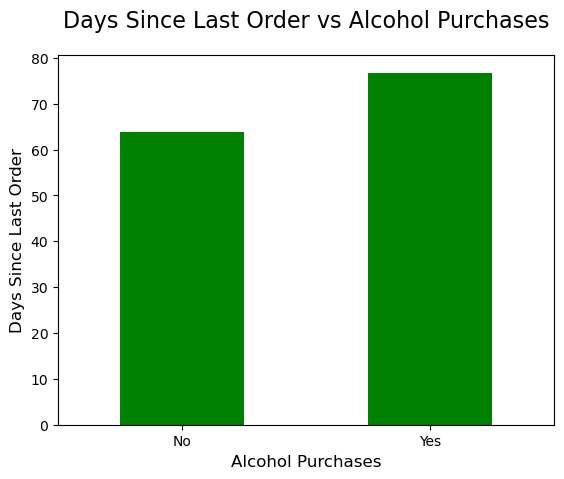

In [103]:
bar_alc_prior_mean = alc_prior_mean.plot(kind = 'bar', rot = 0, color= 'green', legend=None)
plt.title('Days Since Last Order vs Alcohol Purchases', fontsize = 16, pad=20)
plt.ylabel('Days Since Last Order', fontsize = 12)
plt.xlabel('Alcohol Purchases',  fontsize = 12)

In [ ]:
# Observation: Those who purchase alcohol have a higher "days_since_prior_order". 
# However, since the difference between 'Yes' and 'No' category is only 10 days, 
# the difference does not appear to be a significant difference

In [104]:
bar_alc_prior_mean.figure.savefig('/Users/samantha/Documents/Instacart Analysis/04 Analysis/Visualizations/bar_alc_prior_mean.png')

In [ ]:
# AGGREGATION OF BABY PURCHASES VS PRICES #

In [110]:
customers_new.groupby('have_baby').agg({'prices' : ['mean', 'min', 'max']})

prices                  
               mean  min          max
have_baby                            
No         8.028632  1.0  1485.966707
Yes        7.634399  1.0    15.000000

In [111]:
have_baby_price_mean = customers_new.groupby ('have_baby').agg({'prices' : ['mean']})

Text(0.5, 0, 'Have Baby')

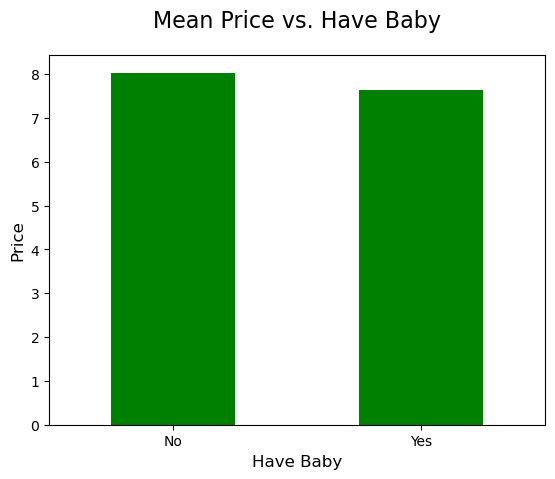

In [112]:
bar_baby_prices_mean = have_baby_price_mean.plot(kind = 'bar', rot = 0, color= 'green', legend=None)
plt.title('Mean Price vs. Have Baby', fontsize = 16, pad=20)
plt.ylabel('Price', fontsize = 12)
plt.xlabel('Have Baby',  fontsize = 12)

In [ ]:
# Observation: No significant difference

In [ ]:
# EXPORT BAR CHART #

In [113]:
bar_baby_prices_mean.figure.savefig('/Users/samantha/Documents/Instacart Analysis/04 Analysis/Visualizations/bar_baby_prices_mean.png')

In [ ]:
# AGGREGATION OF BABY PURHCASES VS DAYS SINCE PRIOR ORDER #

In [114]:
customers_new.groupby('have_baby').agg({'days_since_prior_order' : ['mean', 'min', 'max']})

days_since_prior_order                 
                            mean  min         max
have_baby                                        
No                     49.610752  0.0  732.296896
Yes                    42.676740  0.0  732.296896

In [115]:
baby_prior_order_mean = customers.groupby('have_baby').agg({'days_since_prior_order' : ['mean']})

Text(0.5, 0, 'Have Baby')

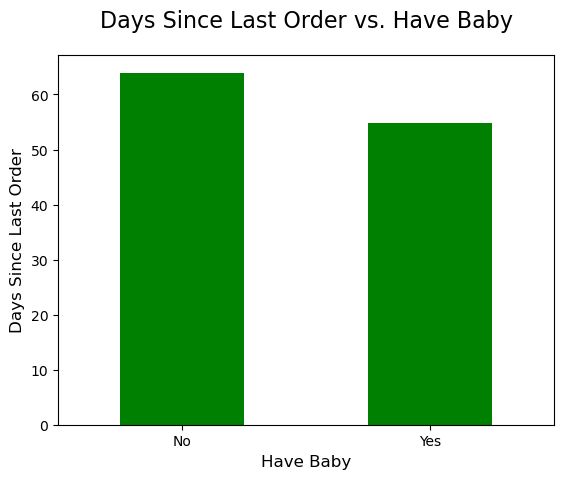

In [116]:
bar_baby_prior_order_mean = baby_prior_order_mean.plot(kind = 'bar', rot = 0, color= 'green', legend=None)
plt.title('Days Since Last Order vs. Have Baby', fontsize = 16, pad=20)
plt.ylabel('Days Since Last Order', fontsize = 12)
plt.xlabel('Have Baby',  fontsize = 12)

In [ ]:
# Observation: Customers with babies order slightly more frequently than those without. 

In [ ]:
# EXPORT BAR CHART #

In [117]:
bar_baby_prior_order_mean.figure.savefig('/Users/samantha/Documents/Instacart Analysis/04 Analysis/Visualizations/bar_baby_prior_order_mean.png')

In [ ]:
# AGGREGATION OF PET PURCHASES VS PRICES #

In [118]:
customers_new.groupby('have_pet').agg({'prices' : ['mean', 'min', 'max']})

prices                  
              mean  min          max
have_pet                            
No        8.023817  1.0  1485.966707
Yes       7.887489  1.0    15.000000

In [ ]:
# AGGREGATION OF PET PURCHASES VS DAYS SINCE PRIOR ORDER (MEAN) #

In [120]:
have_pet_prior_order_mean = customers_new.groupby('have_pet').agg({'days_since_prior_order' : ['mean']})

Text(0.5, 0, 'Have Pet')

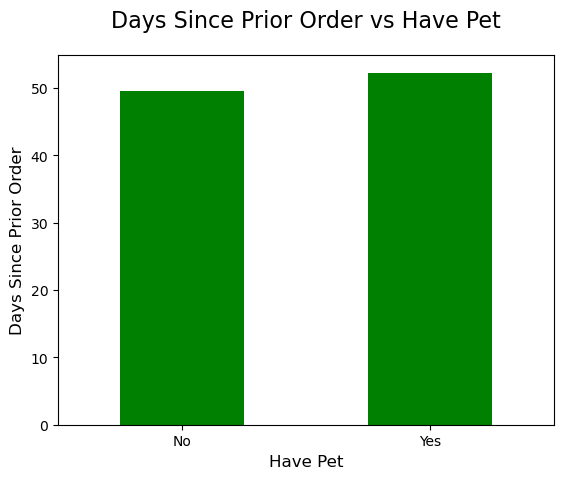

In [121]:
bar_have_pet_prior_order_mean = have_pet_prior_order_mean.plot(kind = 'bar', rot = 0, color= 'green', legend=None)
plt.title('Days Since Prior Order vs Have Pet', fontsize=16, pad=20)
plt.ylabel('Days Since Prior Order', fontsize = 12)
plt.xlabel('Have Pet', fontsize = 12)

In [ ]:
# Observation: Customers without pets order slightly more than those with pets. 

In [ ]:
# EXPORT BAR CHART #

In [122]:
bar_have_pet_prior_order_mean.figure.savefig('/Users/samantha/Documents/Instacart Analysis/04 Analysis/Visualizations/bar_have_pet_prior_order_mean.png')

In [ ]:
# AGGREGATION OF DEPENDENTS VS PRICES #

In [123]:
dependents_prices = customers_new.groupby('dependents').agg({'prices' : ['mean', 'min', 'max']})

In [ ]:
# BAR CHART OF DEPENDENTS VS PRICE (MEAN) #

In [174]:
dependents_prices_mean = customers_new.groupby('dependent_category').agg({'prices' : ['mean']})

Text(0.5, 0, 'Number of Dependents')

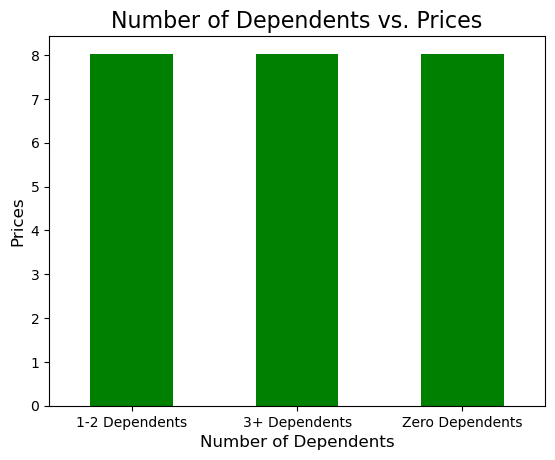

In [175]:
bar_dependents_prices_mean = dependents_prices_mean.plot(kind = 'bar', rot = 0, color = 'green', legend=None)
plt.title('Number of Dependents vs. Prices', fontsize=16)
plt.ylabel('Prices', fontsize=12)
plt.xlabel('Number of Dependents', fontsize=12)

In [ ]:
# EXPORT BAR #

In [127]:
bar_dependents_prices_mean.figure.savefig('/Users/samantha/Documents/Instacart Analysis/04 Analysis/Visualizations/bar_dependents_prices_mean.png')

In [ ]:
# AGGREGATION OF ORDER HOUR OF DAY VS PRICE #

In [128]:
order_hour_price = customers_new.groupby('order_hour_of_day').agg({'prices' : ['mean', 'min', 'max'] })

In [ ]:
# AGGREGATIONx OF ORDER HOUR OF DAY VS PRICE (MEAN) #

In [129]:
order_hour_price_mean = customers_new.groupby('order_hour_of_day').agg({'prices' : ['mean'] })

Text(0.5, 0, 'Time of Order')

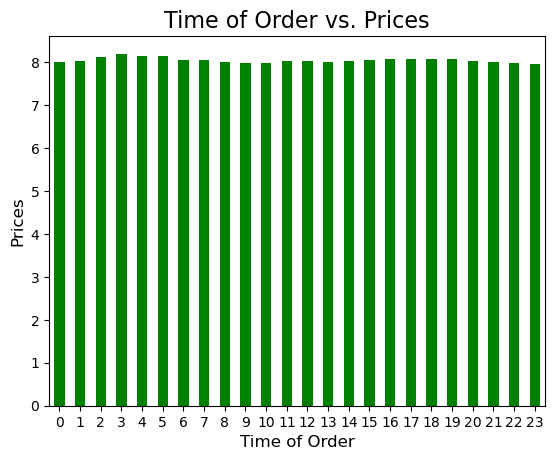

In [130]:
bar_order_hour_prices_mean = order_hour_price_mean.plot(kind = 'bar', rot = 0, color = 'green', legend=None)
plt.title('Time of Order vs. Prices', fontsize=16)
plt.ylabel('Prices', fontsize=12)
plt.xlabel('Time of Order', fontsize=12)

In [ ]:
# EXPORT BAR CHART #

In [131]:
bar_order_hour_prices_mean.figure.savefig('/Users/samantha/Documents/Instacart Analysis/04 Analysis/Visualizations/bar_order_hour_prices_mean.png')

In [ ]:
##### 4.10.8
##### Compare your customer profiles with regions and departments. Can you identify a link between them? 

In [ ]:
# AGGREGATION OF CUSTOMER LOYALTY VS REGION #

In [132]:
cust_loyalty_region = pd.crosstab(customers_new['region'], customers_new['loyalty_flag'], dropna = False)
cust_loyalty_region

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,2373774,1136761,3750978
Northeast,1841785,842156,2780744
South,3206660,1497190,5001476
West,2648985,1232711,4026124


Text(0.5, 0, 'Region')

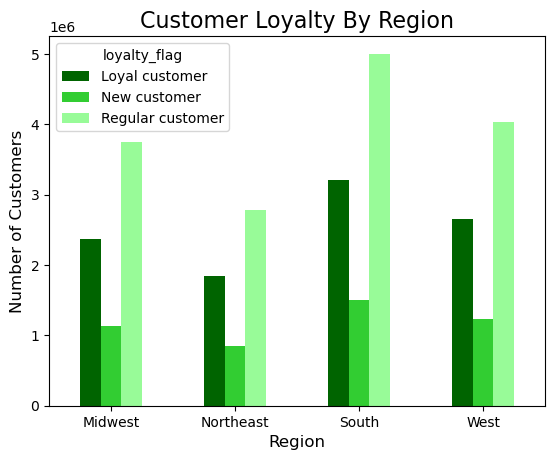

In [133]:
bar_cust_loyalty_region = cust_loyalty_region.plot(kind = 'bar', rot = 0, color = ['darkgreen', 'limegreen', 'palegreen'])
plt.title('Customer Loyalty By Region', fontsize=16)
plt.ylabel('Number of Customers', fontsize=12)
plt.xlabel('Region', fontsize=12)

In [ ]:
# Observations:
#   The South has the most customers
#   There are more regular customers than loyal customers
#   New Customers are the smallest group

In [ ]:
# EXPORT BAR CHART #

In [134]:
bar_cust_loyalty_region.figure.savefig('/Users/samantha/Documents/Instacart Analysis/04 Analysis/Visualizations/bar_cust_loyalty_region.png')

In [ ]:
# AGGREGATION OF LOYALTY VS ORDER FREQUENCY #

In [135]:
cust_loyalty_freq_norm = pd.crosstab(customers_new['loyalty_flag'], customers_new['order_frequency_flag'], dropna = False, normalize='index')

cust_loyalty_freq_norm.to_clipboard()
cust_loyalty_freq_norm

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
loyalty_flag,,,
Loyal customer,0.999567,0.000000,0.000433
New customer,0.211989,0.502928,0.285083
Regular customer,0.567663,0.078239,0.354098


In [ ]:
# BAR CHART OF CUSTOMER LOYALTY VS ORDER FREQUENCY #

<AxesSubplot:title={'center':'Customer Loyalty vs. Order Frequency'}, xlabel='Loyalty Level', ylabel='Percentage'>

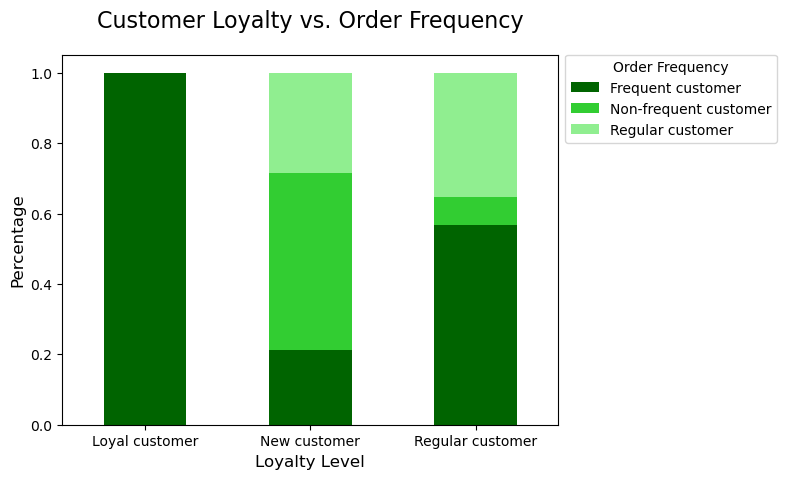

In [136]:
bar_cust_loyalty_freq_norm = cust_loyalty_freq_norm.plot(kind = 'bar', rot = 0, stacked=True, color= ['darkgreen', 'limegreen','lightgreen'])
plt.title('Customer Loyalty vs. Order Frequency', fontsize = 16, pad=20)
bar_cust_loyalty_freq_norm.legend(title='Order Frequency', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.ylabel('Percentage', fontsize = 12)
plt.xlabel('Loyalty Level',  fontsize = 12)


bar_cust_loyalty_freq_norm

In [ ]:
# EXPORT BAR CHART #

In [137]:
bar_cust_loyalty_freq_norm.figure.savefig('/Users/samantha/Documents/Instacart Analysis/04 Analysis/Visualizations/bar_cust_loyalty_freq_norm.png')

In [ ]:
# CREATE LOYALTY VS ACTIVITY LEVEL FLAG #

In [138]:
cust_loyalty_activity_flag = pd.crosstab(customers_new['loyalty_flag'], customers_new['activity_level'], dropna = False, normalize='index')

cust_loyalty_activity_flag

activity_level,High Activity
loyalty_flag,
Loyal customer,1.0
New customer,1.0
Regular customer,1.0


In [ ]:
# AGGREGATION OF CUSTOMER LOYALTY VS DAYS SINCE PRIOR ORDER #

In [139]:
cust_loyalty_order_freq = customers_new.groupby('loyalty_flag').agg({'days_since_prior_order' : ['mean']})

cust_loyalty_order_freq

,days_since_prior_order
,mean
loyalty_flag,
Loyal customer,19.353637
New customer,118.395687
Regular customer,48.218749


In [ ]:
# BAR CHART CUSTOMER LOYALTY VS DAYS SINCE PRIOR ORDER #

Text(0.5, 0, 'Loyalty Categories')

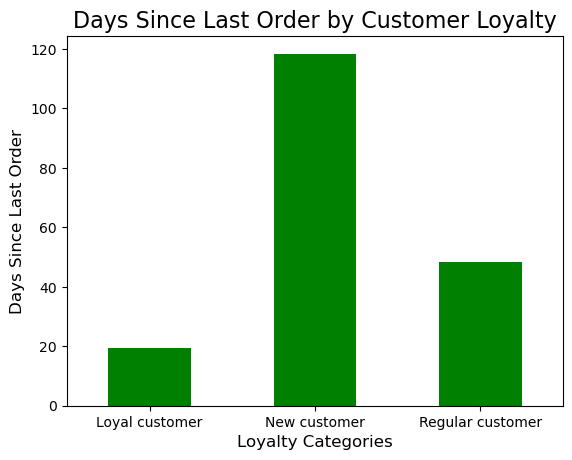

In [140]:
bar_cust_loyalty_order_freq = cust_loyalty_order_freq.plot(kind = 'bar', rot = 0, color = 'green', legend=None)
plt.title('Days Since Last Order by Customer Loyalty', fontsize=16)
plt.ylabel('Days Since Last Order', fontsize=12)
plt.xlabel('Loyalty Categories', fontsize=12)

In [ ]:
# Observation: Number of days since last order is lowest for Loyal Customer and highest for New Customer

In [ ]:
# EXPORT BAR CHART #

In [144]:
bar_cust_loyalty_order_freq.figure.savefig('/Users/samantha/Documents/Instacart Analysis/04 Analysis/Visualizations/bar_cust_loyalty_order_freq.png')

In [ ]:
# AGGREGATION OF CUSTOMER INCOME VS REGION #

In [142]:
cust_income_region = pd.crosstab(customers_new['region'], customers_new['income_category'], dropna = False)
cust_income_region

income_category,High Income,Low Income,Middle Income
region,,,
Midwest,635230,864462,5761821
Northeast,475835,648484,4340366
South,871830,1182262,7651234
West,686571,926188,6295061


<AxesSubplot:title={'center':'Customer Income by Region'}, xlabel='Region', ylabel='Number of Customers (millions)'>

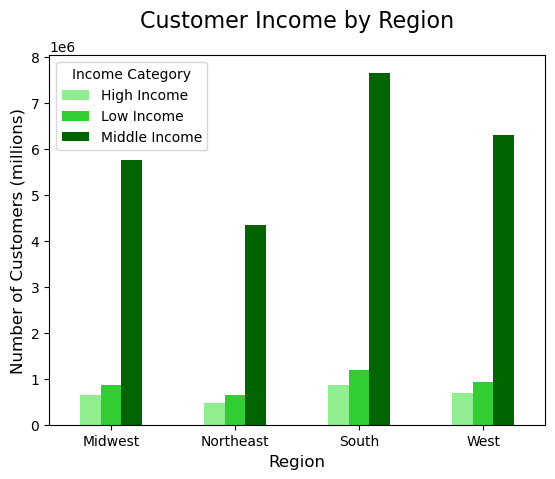

In [143]:
bar_cust_income_region = cust_income_region.plot(kind = 'bar', rot = 0, color= ['lightgreen', 'limegreen', 'darkgreen'])
plt.title('Customer Income by Region', fontsize = 16, pad=20)
bar_cust_income_region.legend(title='Income Category', loc='upper left')
plt.ylabel('Number of Customers (millions)', fontsize = 12)
plt.xlabel('Region',  fontsize = 12)

bar_cust_income_region

In [ ]:
# Observations
#   Most customers are in the Middle Income category
#   The South has highest total income compared to other regions

In [ ]:
# EXPORT BAR CHART #

In [145]:
bar_cust_income_region.figure.savefig('/Users/samantha/Documents/Instacart Analysis/04 Analysis/Visualizations/bar_cust_income_region.png')

In [ ]:
# AGGREGATION OF CUSTOMER INCOME BY DEPARTMENT #

In [189]:
ct_income_department = pd.crosstab(customers_new['department'], customers['income_category'], dropna = False, normalize = 'columns')
ct_income_department

income_category,High Income,Low Income,Middle Income
department,,,
alcohol,0.006762,0.005240,0.004352
babies,0.013554,0.009217,0.013827
bakery,0.038980,0.032006,0.036518
beverages,0.081392,0.111898,0.078907
breakfast,0.021097,0.026860,0.020947
bulk,0.000880,0.001371,0.001059
canned goods,0.034312,0.023989,0.033812
dairy eggs,0.169504,0.150362,0.169473
deli,0.032507,0.031648,0.032525


In [ ]:
# Observations
#   Low Income category spends 
#     more on snacks (~16%) and more on beverages than Middle (~8%) and High Income (~8%) categories
#     slightly less on babies (spends ~0.9%) than Middle (~1.4) and High Income (~1.4) categories
#.    slightly less on meat/seafood (spends ~1%) than Middle (~2.3%) and High Income (~2.3%) categories
#     slightly less on pantry (spends ~5%) than Middle (~6%) and High Income (~6%)
#   Middle Income category spends more on produce (~30%) than Low Income (~24%) and High Income (~28%)

In [147]:
cust_income_dept.to_clipboard()

In [ ]:
# AGGREGATION OF DEPENDENTS VS REGION #

In [155]:
cust_dependents_region = pd.crosstab(customers_new['region'], customers_new['dependent_category'], dropna=False)
cust_dependents_region

dependent_category,1-2 Dependents,3+ Dependents,Zero Dependents
region,,,
Midwest,3651411,1787286,1822816
Northeast,2728970,1381233,1354482
South,4834288,2436257,2434781
West,3940373,2009486,1957961


<AxesSubplot:title={'center':'Dependent Categories by Region'}, xlabel='Region', ylabel='Frequency (millions)'>

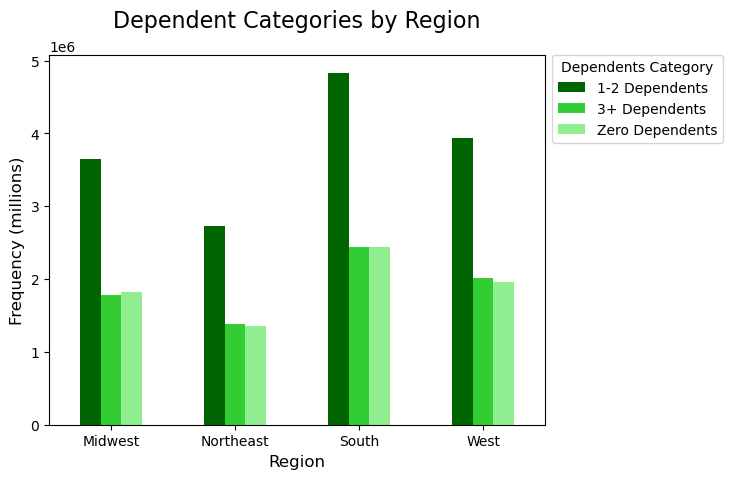

In [156]:
bar_cust_dependents_region = cust_dependents_region.plot(kind = 'bar', rot = 0, color= ['darkgreen', 'limegreen', 'lightgreen', 'yellowgreen'])
plt.title('Dependent Categories by Region', fontsize = 16, pad=20)
bar_cust_dependents_region.legend(title='Dependents Category', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.ylabel('Frequency (millions)', fontsize = 12)
plt.xlabel('Region',  fontsize = 12)

bar_cust_dependents_region

In [ ]:
# Observation: When 1 Dependent and 2 Dependents categories are combined, it is the largest group by region

In [ ]:
# EXPORT BAR CHART #

In [157]:
bar_cust_dependents_region.figure.savefig('/Users/samantha/Documents/Instacart Analysis/04 Analysis/Visualizations/bar_cust_dependents_region.png')

In [ ]:
# AGGREGATION OF ALCOHOL PURCHASES BY REGION #

In [158]:
cust_alcohol_region = pd.crosstab(customers_new['region'], customers_new['alcohol_purchase'], dropna = False)
cust_alcohol_region

alcohol_purchase,No,Yes
region,,
Midwest,7227470,34043
Northeast,5439668,25017
South,9659345,45981
West,7871188,36632


In [ ]:
# BAR CHART OF ALCOHOL PURCHASES BY REGION #

Text(0.5, 0, 'Region')

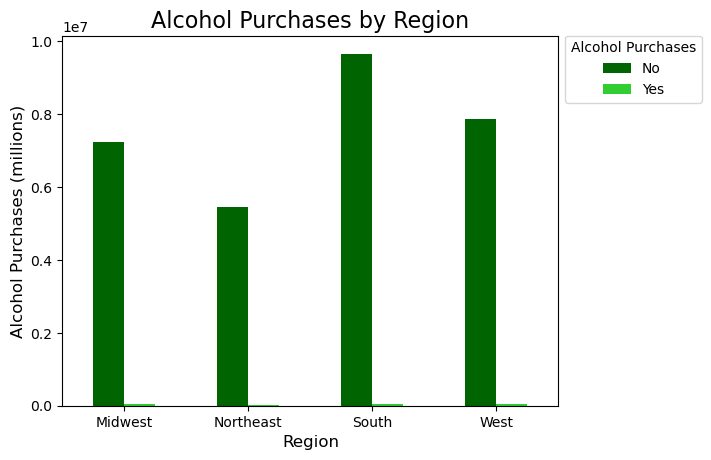

In [159]:
bar_cust_alcohol_region = cust_alcohol_region.plot(kind='bar', rot=0, color=['darkgreen', 'limegreen'])
plt.title('Alcohol Purchases by Region', fontsize=16)
bar_cust_alcohol_region.legend(title='Alcohol Purchases', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.ylabel('Alcohol Purchases (millions)', fontsize=12)
plt.xlabel('Region', fontsize=12)

In [ ]:
# Observation: 
#   All regions have very low frequencies of alcohol purchases
#   Alcohol purchases are highest in the South and lowest in the Northeast

In [ ]:
# EXPORT BAR CHART #

In [160]:
bar_cust_alcohol_region.figure.savefig('/Users/samantha/Documents/Instacart Analysis/04 Analysis/Visualizations/bar_cust_alcohol_region.png')

In [ ]:
# AGGREGATION OF BABY PURCHASES BY REGION #

In [161]:
cust_baby_region = pd.crosstab(customers_new['region'], customers_new['dependent_category'], dropna = False)
cust_baby_region

dependent_category,1-2 Dependents,3+ Dependents,Zero Dependents
region,,,
Midwest,3651411,1787286,1822816
Northeast,2728970,1381233,1354482
South,4834288,2436257,2434781
West,3940373,2009486,1957961


In [ ]:
# BAR CHART OF BABY PURCHASES BY REGION #

<AxesSubplot:title={'center':'Baby Purchases by Region'}, xlabel='Region', ylabel='Baby Purchases (millions)'>

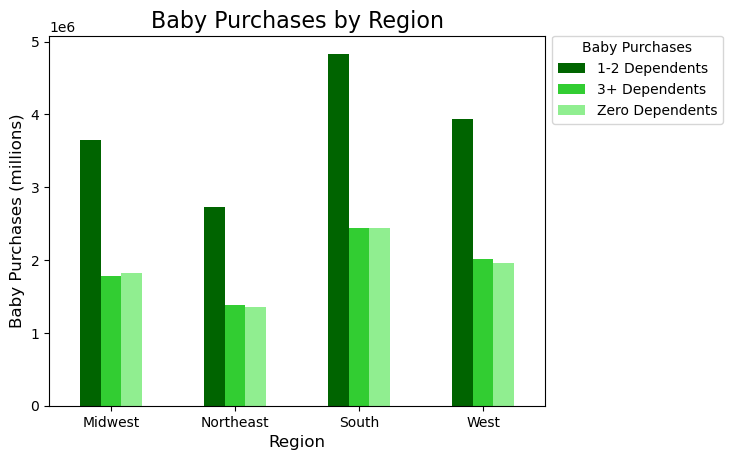

In [162]:
bar_cust_baby_region = cust_baby_region.plot(kind='bar', rot=0, color=['darkgreen', 'limegreen', 'lightgreen', 'yellowgreen'])
plt.title('Baby Purchases by Region', fontsize=16)
bar_cust_baby_region.legend(title='Baby Purchases', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.ylabel('Baby Purchases (millions)', fontsize=12)
plt.xlabel('Region', fontsize=12)

bar_cust_baby_region

In [ ]:
# Observations
#  The South has the highest frequency of baby purchases by region
#  When 1-2 Dependents categories are combined, 
#    the 2 categories are accountable for the highest frequency of baby purchases

In [ ]:
# EXPORT BAR CHART #

In [163]:
bar_cust_baby_region.figure.savefig('/Users/samantha/Documents/Instacart Analysis/04 Analysis/Visualizations/bar_cust_baby_region.png')

In [ ]:
# AGGREGATION OF PET PURCHASES BY REGION #

In [164]:
cust_pet_region = pd.crosstab(customers_new['region'], customers_new['have_pet'], dropna = False)
cust_pet_region

have_pet,No,Yes
region,,
Midwest,7240155,21358
Northeast,5446951,17734
South,9677343,27983
West,7883918,23902


In [ ]:
# BAR CHART OF PET PURCHASES BY REGION #

<AxesSubplot:title={'center':'Pet Purchases by Region'}, xlabel='Region', ylabel='Pet Purchases (millions)'>

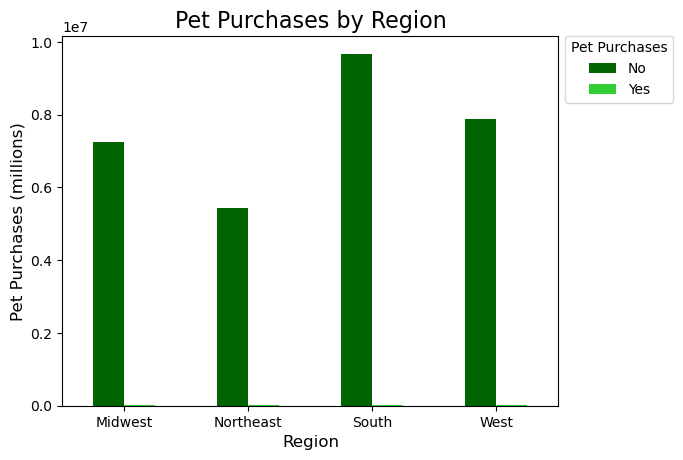

In [165]:
bar_cust_pet_region = cust_pet_region.plot(kind='bar', rot=0, color=['darkgreen', 'limegreen', 'lightgreen', 'yellowgreen'])
plt.title('Pet Purchases by Region', fontsize=16)
bar_cust_pet_region.legend(title='Pet Purchases', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.ylabel('Pet Purchases (millions)', fontsize=12)
plt.xlabel('Region', fontsize=12)

bar_cust_pet_region

In [ ]:
# Observations
#  The South has the highest frequency of non-pet purchases by region
#  The Northeast has the lowest frequency of non-pet purchases by region

In [ ]:
# EXPORT BAR CHART #

In [166]:
bar_cust_pet_region.figure.savefig('/Users/samantha/Documents/Instacart Analysis/04 Analysis/Visualizations/bar_cust_pet_region.png')

In [ ]:
# AGGREGATION OF TIME ORDER AND REGION #

In [167]:
cust_time_order_region = pd.crosstab(customers_new['region'], customers_new['time_of_order'], dropna = False)
cust_time_order_region

time_of_order,Day,Evening,Overnight
region,,,
Midwest,5110082,1752171,399260
Northeast,3853882,1306157,304646
South,6836768,2327724,540834
West,5595885,1878132,433803


In [ ]:
# BAR CHART OF TIME ORDER AND REGION #

<AxesSubplot:title={'center':'Order Time of Day by Region'}, xlabel='Region', ylabel='Number of Orders (millions)'>

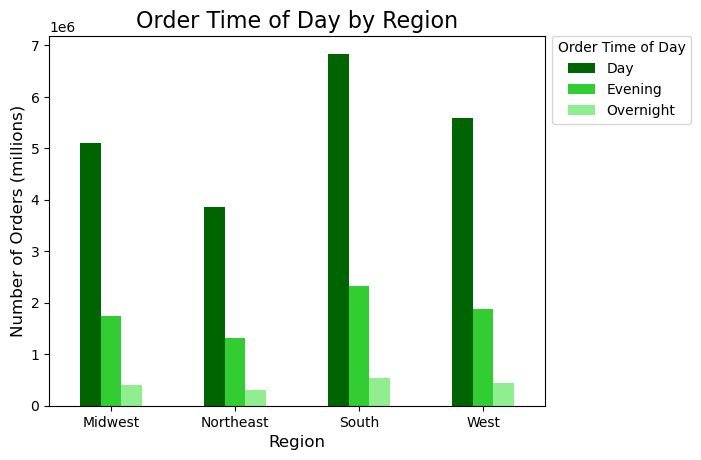

In [168]:
bar_cust_time_order_region = cust_time_order_region.plot(kind = 'bar', rot = 0, color = ['darkgreen', 'limegreen', 'lightgreen', 'yellowgreen'])
plt.title('Order Time of Day by Region', fontsize=16)
bar_cust_time_order_region.legend(title='Order Time of Day', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.ylabel('Number of Orders (millions)', fontsize=12)
plt.xlabel('Region', fontsize=12)

bar_cust_time_order_region

In [ ]:
# Observations:
#  There number of daytime orders is highest across all regions
#  The South has the highest total number of orders

In [ ]:
# EXPORT BAR CHART #

In [169]:
bar_cust_time_order_region.figure.savefig('/Users/samantha/Documents/Instacart Analysis/04 Analysis/Visualizations/bar_cust_time_order_region.png')

In [ ]:
# AGGREGATION OF TIME ORDER AND REGION (NORMALIZED) #

In [170]:
cust_time_order_region_norm = pd.crosstab(customers_new['region'], customers_new['time_of_order'], dropna = False, normalize=True)
cust_time_order_region_norm

time_of_order,Day,Evening,Overnight
region,,,
Midwest,0.168431,0.057752,0.013160
Northeast,0.127026,0.043052,0.010041
South,0.225343,0.076723,0.017826
West,0.184443,0.061904,0.014298


In [ ]:
# BAR CHART OF TIME ORDER AND REGION (NORMALIZED) #

<AxesSubplot:title={'center':'Percentage of Order Time of Day by Region'}, xlabel='Region', ylabel='Percentage of Orders'>

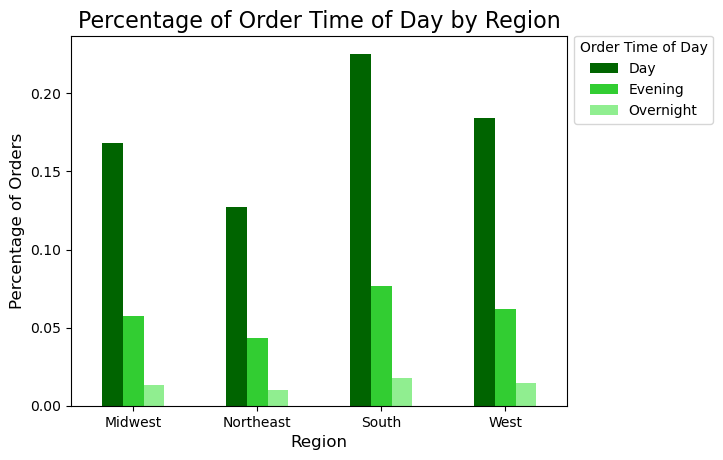

In [171]:
bar_cust_time_order_region_norm = cust_time_order_region_norm.plot(kind = 'bar', rot = 0, color = ['darkgreen', 'limegreen', 'lightgreen', 'yellowgreen'])
plt.title('Percentage of Order Time of Day by Region', fontsize=16)
bar_cust_time_order_region_norm.legend(title='Order Time of Day', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.ylabel('Percentage of Orders', fontsize=12)
plt.xlabel('Region', fontsize=12)

bar_cust_time_order_region_norm

In [ ]:
# Observations: 
#  The south has the highest percentage of daytime orders (~22%)
#  Followed by the West (~18%), The Midwest (~17%), and Northeast (13%)

In [ ]:
# EXPORT BAR CHART #

In [172]:
bar_cust_time_order_region_norm.figure.savefig('/Users/samantha/Documents/Instacart Analysis/04 Analysis/Visualizations/bar_cust_time_order_region_norm.png')

In [ ]:
# BAR CHART FOR AGE CATEGORY VS ORDERS DAY OF WEEK #

In [177]:
ct_OrderDay_age = pd.crosstab(customers['age_category'], customers['orders_day_of_week'], dropna = False, normalize = 'index')
ct_OrderDay_age

orders_day_of_week,0,1,2,3,4,5,6
age_category,,,,,,,
Adult 25-40,0.191842,0.176757,0.128892,0.118180,0.117952,0.129878,0.136500
Adult 40-60,0.190390,0.174353,0.130983,0.118083,0.116758,0.129870,0.139562
Adult 60+,0.190620,0.173470,0.129982,0.119266,0.116920,0.130500,0.139243
Young Adult 18-25,0.190478,0.175768,0.129408,0.118064,0.116544,0.131523,0.138215


<AxesSubplot:title={'center':'Age Category vs. Order Day of Week'}, xlabel='Age Category', ylabel='Percentage'>

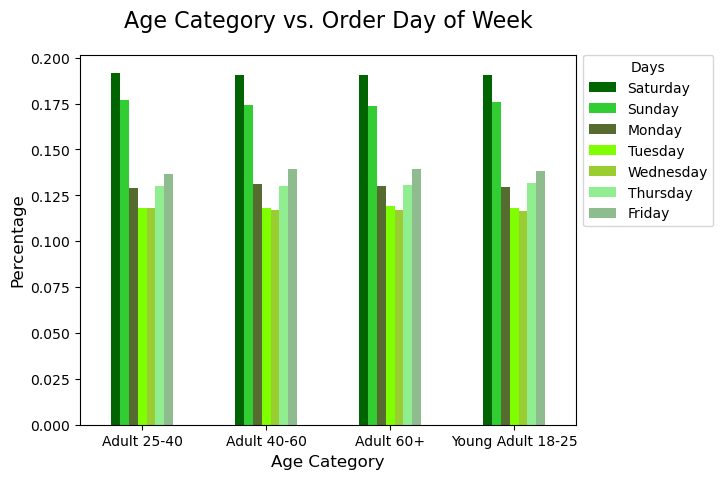

In [179]:
bar_ct_OrderDay_age = ct_OrderDay_age.plot(kind = 'bar', rot = 0, color= ['darkgreen', 'limegreen', 'darkolivegreen', 'chartreuse', 'yellowgreen','lightgreen', 'darkseagreen'])
bar_ct_OrderDay_age.legend(title='Days', bbox_to_anchor=(1, 1.02), loc='upper left', labels=['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.title('Age Category vs. Order Day of Week', fontsize = 16, pad=20)
plt.ylabel('Percentage', fontsize = 12)
plt.xlabel('Age Category',  fontsize = 12)

bar_ct_OrderDay_age

In [ ]:
# EXPORT BAR CHART #

In [180]:
bar_ct_OrderDay_age.figure.savefig('/Users/samantha/Documents/Instacart Analysis/04 Analysis/Visualizations/bar_ct_OrderDay_age.png')

In [ ]:
##### 4.10.9
##### Produce suitable charts to illustrate your results and export them in your project folder

In [ ]:
# ALL CHARTS WERE EXPORTED AS THIS TASK PROGRESSED #

In [ ]:
# EXPORT CUSTOMER DATAFRAME #

In [173]:
customers_new.to_pickle('/Users/samantha/Documents/Instacart Analysis/02 Data/Prepared Data/orders_products_all.pkl')